<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP output analysis
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [15]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure'),
    Path('/hpc/srs/Python-data')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")


module_path = /Users/steven/academic-iCloud/Python/modules
data_path = /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure


In [16]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd

# Import custom module
import SRSCALCUTILS.castep_tools as ct

from IPython.display import display, Image as StaticImage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Programme variable setup

In [17]:
# Parameters for windows creation
# General
job_folder = '1x6x8/1x6x8-821MP-SP-negative'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative



                                                    FILE: L8_clean.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_clean   

Final enthalpy = -8363.55887 eV.


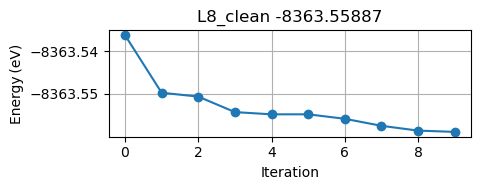

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,205.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,103.0
6,number of down spins,102.0
7,number of bands,124.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                    FILE: L8_Hbb.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_Hbb   

Final enthalpy = -8479.3858 eV.


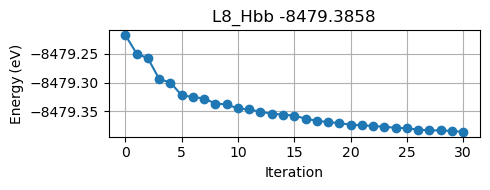

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,212.0
3,net charge of system,-1.0
4,net spin of system,0.0
5,number of up spins,106.0
6,number of down spins,106.0
7,number of bands,127.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                    FILE: L8_1di.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_1di   

Final enthalpy = -8496.08947 eV.


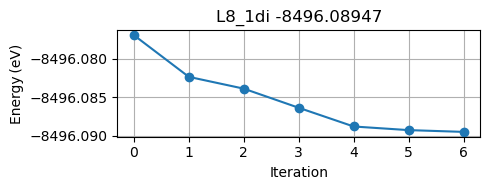

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,213.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,107.0
6,number of down spins,106.0
7,number of bands,128.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                     FILE: L8_DB.castep                                                    
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_DB   

Final enthalpy = -8447.71313 eV.


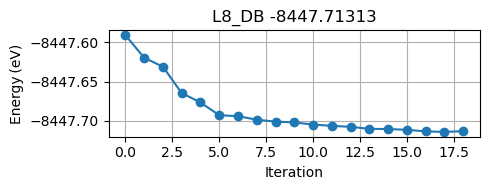

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,210.0
3,net charge of system,-1.0
4,net spin of system,0.0
5,number of up spins,105.0
6,number of down spins,105.0
7,number of bands,126.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                     FILE: L8_mono.castep                                                    
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_mono   

Final enthalpy = -8464.2094 eV.


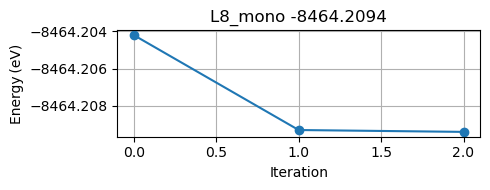

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,211.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,106.0
6,number of down spins,105.0
7,number of bands,127.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                     FILE: L8_Ob.castep                                                    
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_Ob   

Final enthalpy = -8905.24618 eV.


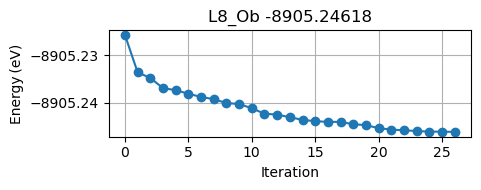

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,217.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,109.0
6,number of down spins,108.0
7,number of bands,131.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                    FILE: L8_3x1.castep                                                     
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_3x1   

Final enthalpy = -8496.17906 eV.


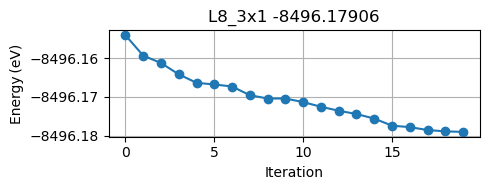

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,213.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,107.0
6,number of down spins,106.0
7,number of bands,128.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                     FILE: L8_di.castep                                                    
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_di   

Final enthalpy = -8558.20589 eV.


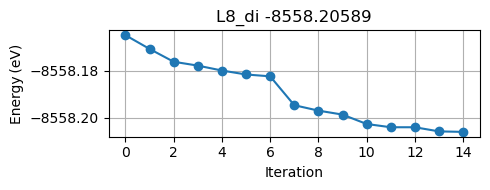

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,217.0
3,net charge of system,-1.0
4,net spin of system,1.0
5,number of up spins,109.0
6,number of down spins,108.0
7,number of bands,131.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')


                                                     FILE: L8_Hb.castep                                                    
   PATH: /Users/steven/academic-iCloud/Calculations/castep/Hydrogen_Bridge/Structure/1x6x8/1x6x8-821MP-SP-negative/L8_Hb   

Final enthalpy = -8479.09956 eV.


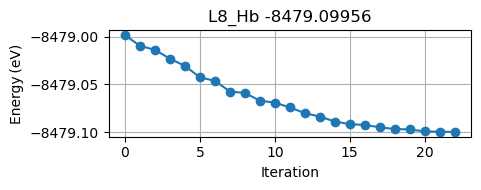

,Cell parameters,Value
0,ax,3.866835
1,ay,23.201008
2,az,25.937060
3,nx,1.000000
4,ny,6.000000
5,nz,8.000000
6,alpha,90.000000
7,beta,90.000000
8,gamma,90.000000


,General parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,none
2,number of electrons,212.0
3,net charge of system,-1.0
4,net spin of system,0.0
5,number of up spins,106.0
6,number of down spins,106.0
7,number of bands,127.0
8,total energy / atom convergence tol.,0.1000E-04 eV
9,eigen-energy convergence tolerance,0.1000E-05 eV


NGLWidget()

Image(value=b'', width='99%')

In [18]:
castep_paths = ct.find_all_files_by_extension(job_path,'castep')
#ct.optimisation_summaries(castep_paths)
ct.optimisation_summaries(castep_paths)


In [19]:
data_summary = ct.collect_summary_table(job_path)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_summary)

,File,RelPath,nx,ny,nz,kx,ky,kz,Cut-off (eV),Net Charge,Net Spin,Final Enthalpy (eV)
0,L8_clean,L8_clean,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8363.55887
1,L8_Hbb,L8_Hbb,1,6,8,8,2,1,800.0000 eV,-1.0,0.0,-8479.38580
2,L8_1di,L8_1di,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8496.08947
3,L8_DB,L8_DB,1,6,8,8,2,1,800.0000 eV,-1.0,0.0,-8447.71313
4,L8_mono,L8_mono,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8464.20940
5,L8_Ob,L8_Ob,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8905.24618
6,L8_3x1,L8_3x1,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8496.17906
7,L8_di,L8_di,1,6,8,8,2,1,800.0000 eV,-1.0,1.0,-8558.20589
8,L8_Hb,L8_Hb,1,6,8,8,2,1,800.0000 eV,-1.0,0.0,-8479.09956


In [20]:
params = {'task' : 'geomopt',
          'xc_functional' : 'PBE',
          'cut_off_energy' : 750,
          'spin_polarised' : 'true',
          'write_cell_structure' : 'true',
          'charge' : 0}

In [21]:
def write_param_file(params):
    width = max(len(k) for k in params)
    for param, value in params.items():
        print(f'{param:<{width+1}} : {value}')